In [15]:
# Importazione delle librerie necessarie

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score


# Caricamento del dataset

data = load_iris()

X = data.data # le caratteristiche

y = data.target # le etichette


# Divisione dei dati in set di addestramento e di test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


# Creazione del modello di classificazione

model = RandomForestClassifier(n_estimators=100, random_state=41) #Algoritmo del modello


# Addestramento del modello

model.fit(X_train, y_train)


# Predizione delle etichette per il set di test

predictions = model.predict(X_test)


# Calcolo dell'accuratezza del modello

accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [16]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [17]:
for col in ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)","target"]:
    group_df = df.groupby(col).count()
    print(df[col].nunique())
    print(group_df)

35
                   sepal width (cm)  petal length (cm)  petal width (cm)  \
sepal length (cm)                                                          
4.3                               1                  1                 1   
4.4                               3                  3                 3   
4.5                               1                  1                 1   
4.6                               4                  4                 4   
4.7                               2                  2                 2   
4.8                               5                  5                 5   
4.9                               6                  6                 6   
5.0                              10                 10                10   
5.1                               9                  9                 9   
5.2                               4                  4                 4   
5.3                               1                  1                 1   
5.4      

sepal length (cm) → lunghezza del sepalo (cm)

sepal width (cm) → larghezza del sepalo (cm)

petal length (cm) → lunghezza del petalo (cm)

petal width (cm) → larghezza del petalo (cm)

target → target (la specie del fiore, codificata come 0, 1, 2)

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


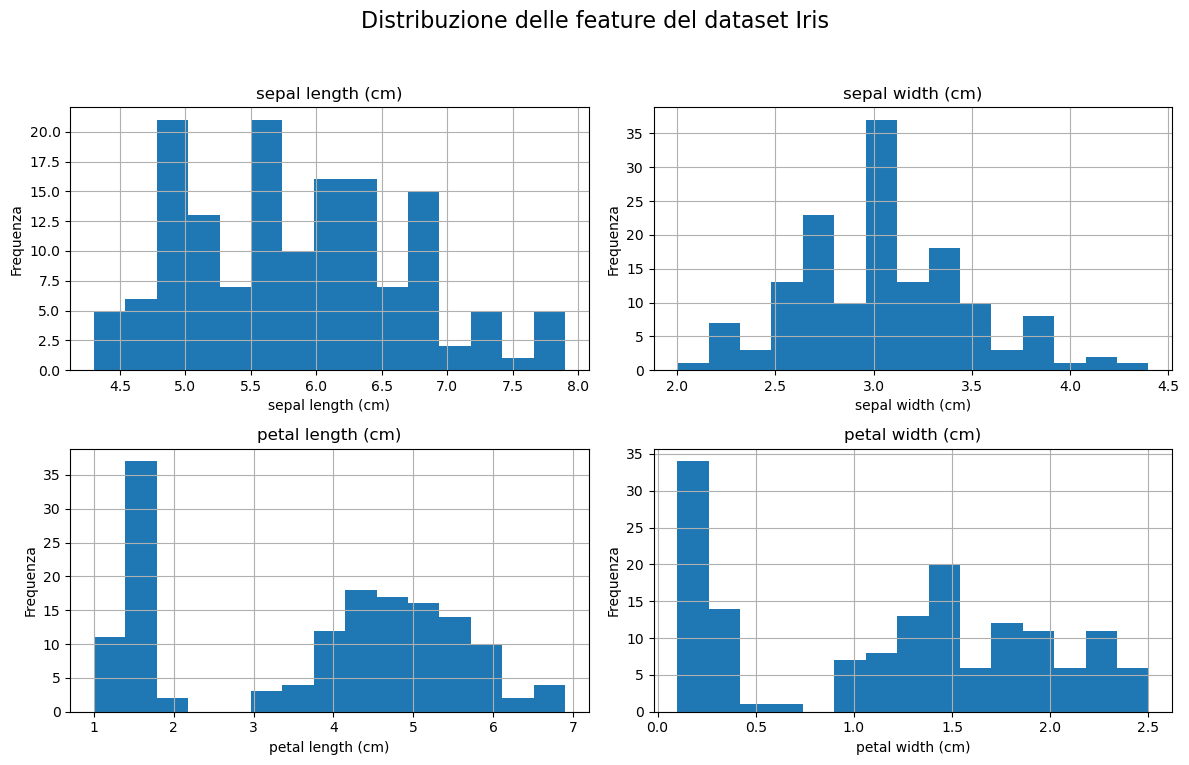

In [20]:
import matplotlib.pyplot as plt

# Istogrammi con etichette
axes = df.iloc[:, :-1].hist(bins=15, figsize=(12,8))

for ax, col in zip(axes.flatten(), df.columns[:-1]):
    ax.set_xlabel(col)          # etichetta asse X
    ax.set_ylabel("Frequenza")  # etichetta asse Y

plt.suptitle("Distribuzione delle feature del dataset Iris", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # sistema spaziamento
plt.show()

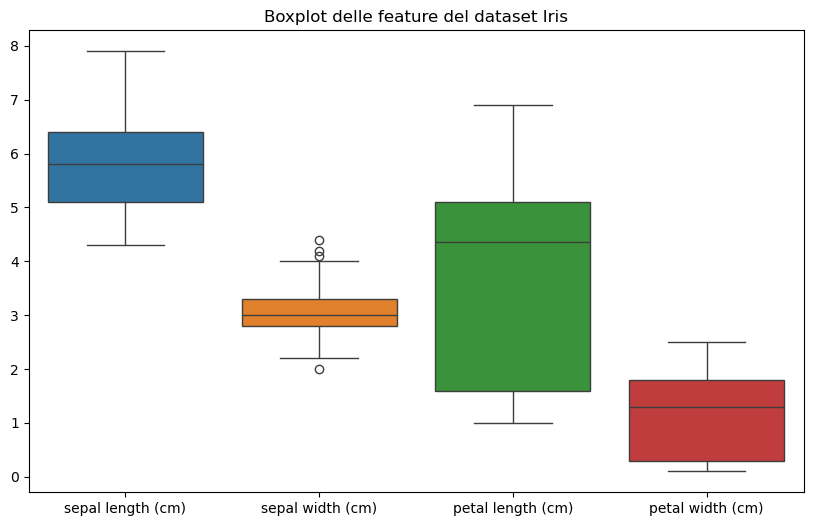

In [21]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title("Boxplot delle feature del dataset Iris")
plt.show()

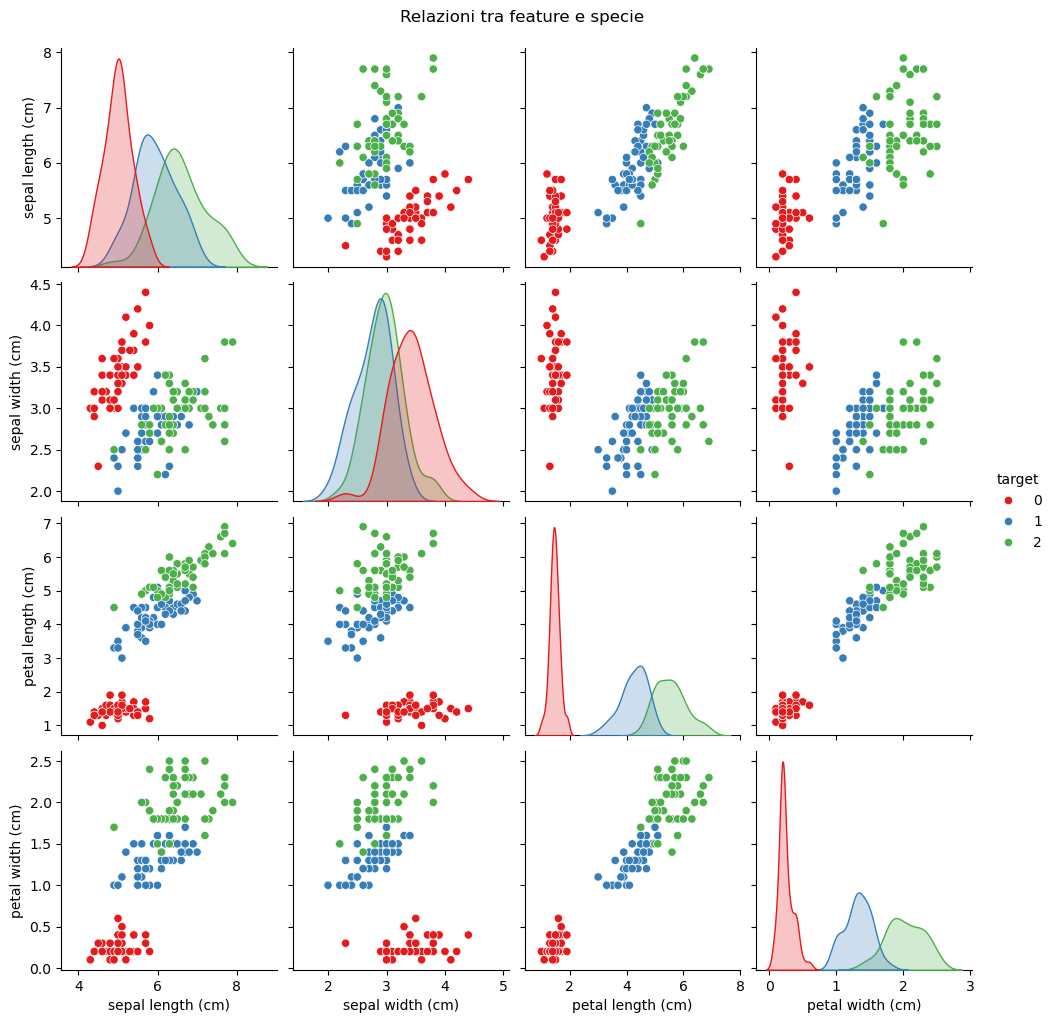

In [22]:
sns.pairplot(df, hue="target", palette="Set1")
plt.suptitle("Relazioni tra feature e specie", y=1.02)
plt.show()

Esempio2

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.85      0.94      0.89        18
   virginica       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



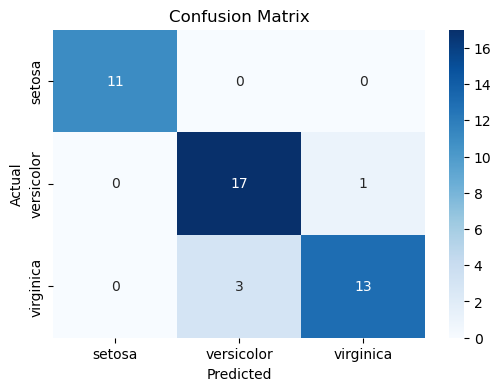

In [26]:
# Importa le librerie necessarie
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carica il dataset Iris
data = load_iris()
X = data.data
y = data.target

# 2. Standardizza le caratteristiche utilizzando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Suddividi i dati in training e test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=41)

# 4. Applica l'algoritmo DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 5. Valuta la performance del modello utilizzando il classification_report
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n", report)

# 6. Visualizza la matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione della matrice di confusione
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
 xticklabels=data.target_names,
 yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
